In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("CHF_CLEAN_DATASET.csv")


In [31]:
df

,hadm_id,subject_id,age_on_admission,GENDER,length_of_stay,avg_creatinine,avg_bun,insurance,is_30_day_readmission
0,142345,10006,70.633619,F,9,4.700000,12.500000,Medicare,0
1,199395,10027,82.491218,F,12,2.300000,56.235294,Medicare,0
2,132349,10029,78.447424,M,10,3.627273,41.000000,Medicare,0
3,140372,10032,88.007973,M,13,1.091667,38.666667,Medicare,0
4,111115,10038,88.032613,F,12,1.192857,31.142857,Medicare,0
5,157839,10040,85.333100,F,4,1.050000,21.666667,Medicare,0
6,148562,10042,70.751346,M,11,0.646154,14.461538,Medicare,0
7,168674,10043,76.018957,M,12,0.993333,28.666667,Medicare,0
8,126949,10045,68.665110,F,7,1.352632,31.263158,Medicare,0
9,100375,10056,83.172941,F,4,1.460000,26.400000,Medicare,0


In [32]:
creatinine_median = df['avg_creatinine'].median()
df['avg_creatinine'] = df['avg_creatinine'].fillna(creatinine_median)

bun_median = df['avg_creatinine'].median()
df['avg_bun'] = df['avg_bun'].fillna(bun_median)

los_median = df['length_of_stay'].median()
df['length_of_stay'] = df['length_of_stay'].fillna(los_median)



In [33]:
readmitted_df = df[df['is_30_day_readmission']==1]
not_readmitted_df = df[df['is_30_day_readmission']==0]

In [34]:
# for CHF cases - does age matter in readmissions 

print(f"Average age of the readmitted: {readmitted_df['age_on_admission'].mean()}")
print(f"Average age not readmitted: {not_readmitted_df['age_on_admission'].mean()}")


Average age of the readmitted: 83.58324366896555
Average age not readmitted: 77.87534555097135


Average creatinine of the readmitted: 1.110897435897436
Average creatinine not readmitted: 1.60618285977558


Text(0.5, 1.0, 'Average creatinine for readmitted vs. not readmitted Patients')

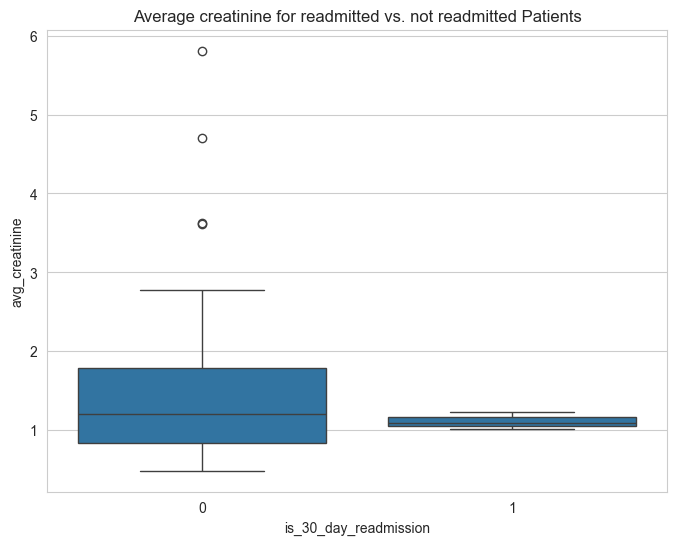

In [35]:
# for CHF cases - does creatinine matter in readmissions 

print(f"Average creatinine of the readmitted: {readmitted_df['avg_creatinine'].mean()}")
print(f"Average creatinine not readmitted: {not_readmitted_df['avg_creatinine'].mean()}")

plt.figure(figsize=(8,6))
sns.boxplot(x='is_30_day_readmission', y='avg_creatinine', data=df)
plt.title('Average creatinine for readmitted vs. not readmitted Patients')

Average LOS of the readmitted: 9.0
Average LOS not readmitted: 10.54054054054054


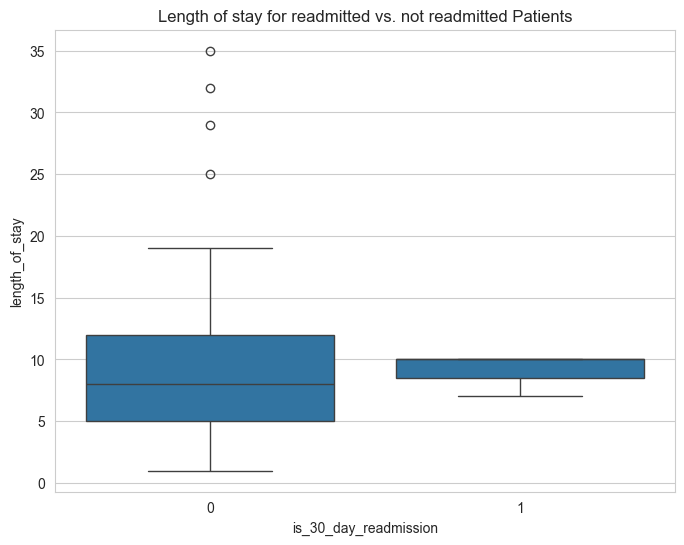

In [26]:
# for CHF cases - does the first hospital stay matter

print(f"Average LOS of the readmitted: {readmitted_df['length_of_stay'].mean()}")
print(f"Average LOS not readmitted: {not_readmitted_df['length_of_stay'].mean()}")
plt.figure(figsize=(8,6))
sns.boxplot(x='is_30_day_readmission', y="length_of_stay", data=df)
plt.title('Length of stay for readmitted vs. not readmitted Patients')
plt.show()



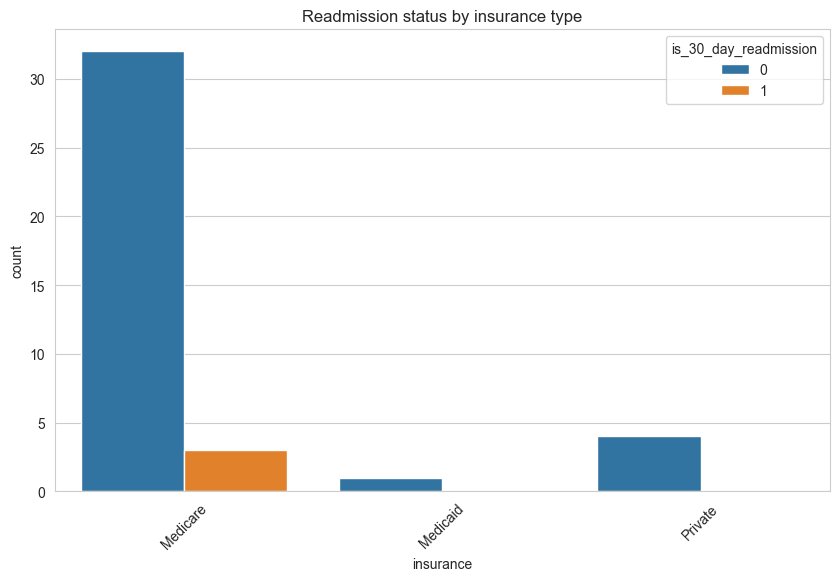

In [37]:
# 

plt.figure(figsize=(10,6))
sns.countplot(x='insurance', hue='is_30_day_readmission', data=df)
plt.title("Readmission status by insurance type")
plt.xticks(rotation=45)
plt.show()

My analysis found that congestive heart failure patients that get readmitted are over 80 years old, and their first hospital visit is shorter by on average, 1 day compared to patients that do not get readmitted. All readmitted patients share the same health insurance which is medicare. They also have lowerer creatinine levels. 

recommendation:
Initiating follow ups for patients 80 years or older that have lower creatinine levels and on medicare. 

<Axes: xlabel='is_30_day_readmission', ylabel='avg_creatinine'>

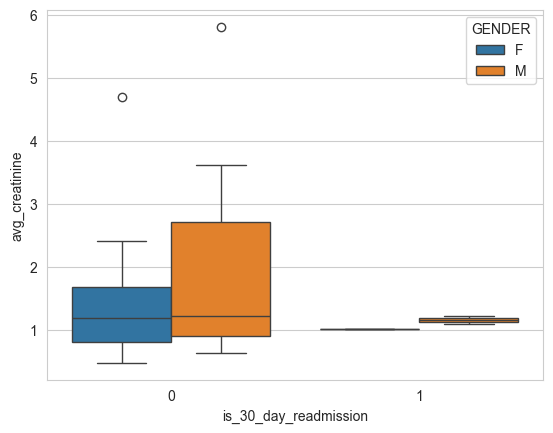

In [11]:
# 0 means they were not readmitted
# 1 means they have been readmitted

sns.boxplot(x="is_30_day_readmission", y="avg_creatinine", hue="GENDER", data=df)